## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [1]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [2]:
kc_house_df = pd.read_csv("data/kc_house_data.csv")
kc_house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,PRIVATE,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220
7,7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
8,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
9,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305


In [3]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [11]:
#Dropping all rows with null values and dropping duplicate values/rows

#Dropping id, date, view, sqft_above, sqft_basement, Yr_reovnated, lat, long and address 
kc_house_df.dropna(inplace= True)
kc_house_df = kc_house_df.drop_duplicates()
#kc_house_df.drop(["id"], axis = 1, inplace = True)
#kc_house_df.drop(["lat"], axis = 1, inplace = True)
#kc_house_df.drop(["long"], axis = 1, inplace = True)
#kc_house_df.drop(["address"], axis = 1, inplace = True)
#kc_house_df.drop(["date"], axis = 1, inplace = True)
#kc_house_df.drop(["view"], axis = 1, inplace = True)
#kc_house_df.drop(["sqft_basement"], axis = 1, inplace = True)
#kc_house_df.drop(["sqft_above"], axis = 1, inplace = True)
kc_house_df.drop(["yr_renovated"], axis = 1, inplace = True)
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30049 non-null  float64
 1   bedrooms      30049 non-null  int64  
 2   bathrooms     30049 non-null  float64
 3   sqft_living   30049 non-null  int64  
 4   sqft_lot      30049 non-null  int64  
 5   floors        30049 non-null  float64
 6   waterfront    30049 non-null  object 
 7   greenbelt     30049 non-null  object 
 8   nuisance      30049 non-null  object 
 9   condition     30049 non-null  object 
 10  grade         30049 non-null  object 
 11  heat_source   30049 non-null  object 
 12  sewer_system  30049 non-null  object 
 13  sqft_garage   30049 non-null  int64  
 14  sqft_patio    30049 non-null  int64  
 15  yr_built      30049 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 3.9+ MB


In [12]:
#Inspecting value counts for all variables
for col in kc_house_df:
    print(kc_house_df[col].value_counts(), "\n")

650000.0     344
750000.0     305
800000.0     298
600000.0     295
850000.0     293
            ... 
903888.0       1
576200.0       1
1081500.0      1
2698000.0      1
720902.0       1
Name: price, Length: 5199, dtype: int64 

3     12730
4      9580
2      3890
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 

2.5     8451
2.0     7311
1.0     4556
3.0     4110
3.5     2262
1.5     1806
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64 

1250    192
1400    190
1560    183
1900    183
1540    181
       ... 
2281      1
2265      1
2105      1
2089      1
2049      1
Name: sqft_living, Length: 1314, dtype: int64 

5000     486
6000     402
4000     373
7200     302
7500     181
        ... 
17057      1
15022   

In [13]:
# Dropping rows with bathrooms and bedrooms less than 1
kc_house_df = kc_house_df[kc_house_df["bedrooms"] >= 1]
kc_house_df = kc_house_df[kc_house_df["bathrooms"] >= 1]
print(kc_house_df["bedrooms"].value_counts(), kc_house_df["bathrooms"].value_counts())

print(kc_house_df.info())

3     12728
4      9577
2      3889
5      2794
6       498
1       378
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 2.5     8451
2.0     7310
1.0     4541
3.0     4110
3.5     2262
1.5     1805
4.0      643
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
7.0       12
7.5       12
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30001 non-null  float64
 1   bedrooms      30001 non-null  int64  
 2   bathrooms     30001 non-null  float64
 3   sqft_living   30001 non-null  int64  
 4   sqft_lot      30001 non-null  int64  
 5   floors        30001 non-null  float64
 6   waterfront    30001 non-null  object 
 7   greenbelt     30001 non-null  object 
 8   nuisan

650000.0     344
750000.0     305
800000.0     297
600000.0     295
850000.0     292
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5193, dtype: int64


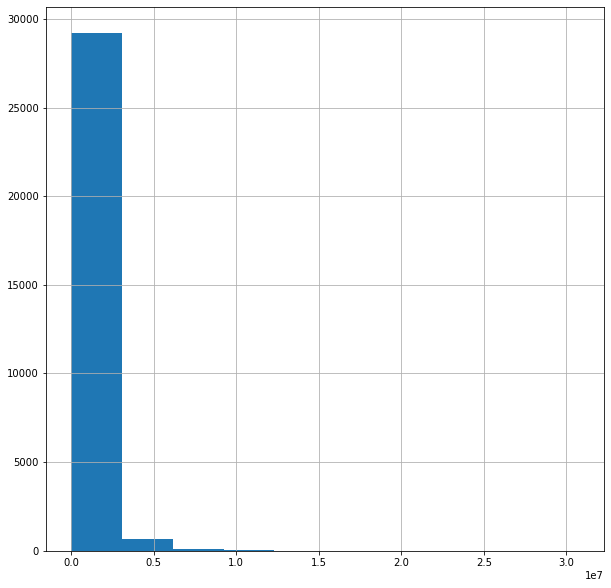

In [14]:
print(kc_house_df['price'].value_counts())
kc_house_df['price'].hist(figsize = (10,10))
plt.show();

In [15]:
# Simplifying garage and patio variables to 1 being 'yes' and 0 being 'no' to that variable
# define a custom function that sets a numeric value to 'yes' or 'no'
def has_doesnt_have(value):
    if value > 0:
        return 1
    else:
        return 0

# apply the function
kc_house_df['garage'] = kc_house_df['sqft_garage'].apply(has_doesnt_have)
kc_house_df['patio'] = kc_house_df['sqft_patio'].apply(has_doesnt_have)

def yes_or_no(value):
    if value == "YES":
        return 1
    else:
        return 0
#apply function

kc_house_df['waterfront'] = kc_house_df['waterfront'].apply(yes_or_no)
kc_house_df['greenbelt'] = kc_house_df['greenbelt'].apply(yes_or_no)
kc_house_df['nuisance'] = kc_house_df['nuisance'].apply(yes_or_no)


In [ ]:
#also I will make a numeric variable out of the grade, condition and remap some 
#kc_house_df['grade'] = kc_house_df['grade'].str.split().str[0].astype(int) 
#kc_house_df["condition"] = kc_house_df["condition"].replace(
#    {'Good': 4, 'Average': 3, 'Very Good': 5, 'Fair': 2, 'Poor': 1})
#kc_house_df["heat_source"] = kc_house_df["heat_source"].replace(
#    {'Gas/Solar': "Other", "Electricity/Solar": "Other", "Oil/Solar": "Other"})
#kc_house_df["sewer_system"] = kc_house_df["sewer_system"].replace(
#    {'PRIVATE RESTRICTED': "PRIVATE", "PUBLIC RESTRICTED": "PUBLIC"})
#kc_house_df = kc_house_df.drop([
#    "lat", "long", "address",'sqft_garage','sqft_basement', 
#    "sqft_living","sqft_above",'sqft_patio','yr_renovated'], axis=1)

In [17]:
print(kc_house_df.info())
print(kc_house_df.describe())
print(kc_house_df.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30001 non-null  float64
 1   bedrooms      30001 non-null  int64  
 2   bathrooms     30001 non-null  float64
 3   sqft_living   30001 non-null  int64  
 4   sqft_lot      30001 non-null  int64  
 5   floors        30001 non-null  float64
 6   waterfront    30001 non-null  int64  
 7   greenbelt     30001 non-null  int64  
 8   nuisance      30001 non-null  int64  
 9   condition     30001 non-null  object 
 10  grade         30001 non-null  object 
 11  heat_source   30001 non-null  object 
 12  sewer_system  30001 non-null  object 
 13  sqft_garage   30001 non-null  int64  
 14  sqft_patio    30001 non-null  int64  
 15  yr_built      30001 non-null  int64  
 16  garage        30001 non-null  int64  
 17  patio         30001 non-null  int64  
dtypes: float64(3), int64(11), 

In [18]:
kc_house_df.corr()["price"]

price          1.000000
bedrooms       0.294467
bathrooms      0.485828
sqft_living    0.614853
sqft_lot       0.085961
floors         0.182920
waterfront     0.234639
greenbelt      0.068552
nuisance       0.010488
sqft_garage    0.267024
sqft_patio     0.315622
yr_built       0.097122
garage         0.111255
patio          0.149405
Name: price, dtype: float64